In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("taxi_trip_pricing.csv", sep=";")
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.26
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.90
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.47
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.62


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [4]:
df = df.dropna(axis=0, thresh=9)

In [5]:
df.isna().sum()

Trip_Distance_km         47
Time_of_Day              49
Day_of_Week              43
Passenger_Count          44
Traffic_Conditions       47
Weather                  46
Base_Fare                48
Per_Km_Rate              47
Per_Minute_Rate          47
Trip_Duration_Minutes    45
Trip_Price               44
dtype: int64

# Numerical variable

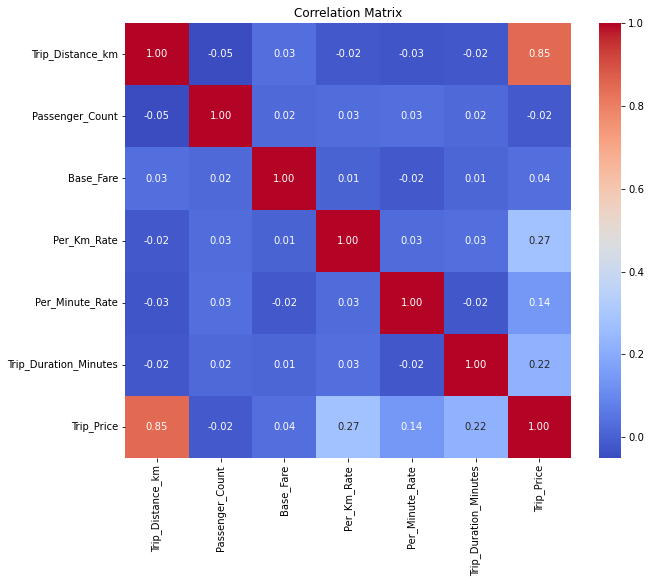

In [6]:
numeric_df = df.select_dtypes(include=['float64'])

# plot correlatin matrix
correlation_matrix = numeric_df.corr()

# show the matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [7]:
# Check skewness for the relevant variables
skew_distance = df['Trip_Distance_km'].skew()
skew_price = df['Trip_Price'].skew()
skew_duration = df['Trip_Duration_Minutes'].skew()#we check also this variable because it has high variance

print(f"Skewness of 'Trip_Distance_km': {skew_distance}")
print(f"Skewness of 'Trip_Price': {skew_price}")
print(f"Skewness of 'Trip_Duration_Minutes': {skew_duration}")

#if the skewness is higher than 1, then we should apply log_transformation

Skewness of 'Trip_Distance_km': 2.2328454304167935
Skewness of 'Trip_Price': 3.7320197759487717
Skewness of 'Trip_Duration_Minutes': 0.018308926471987792


In [8]:
#applying log_transformation
df['Trip_Distance_km_log'] = np.log1p(df['Trip_Distance_km'])
df['Trip_Price_log'] = np.log1p(df['Trip_Price'])

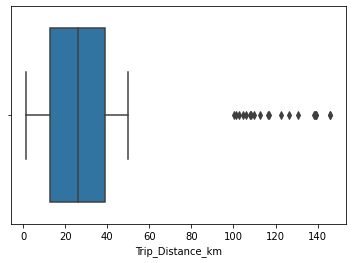

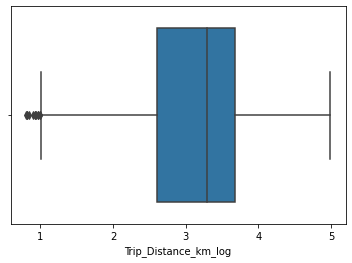

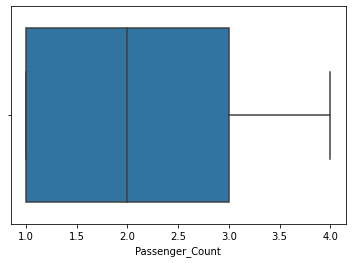

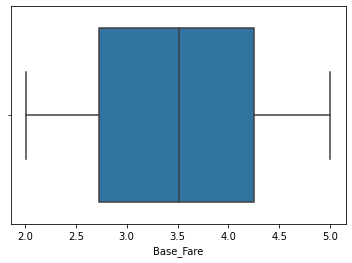

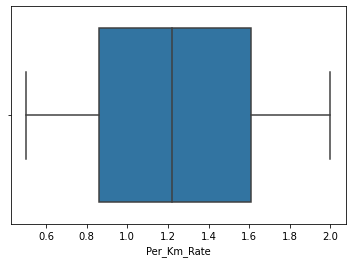

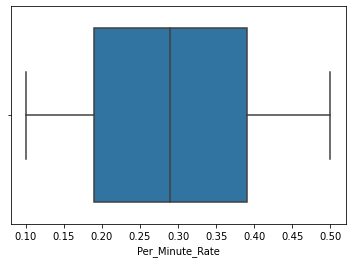

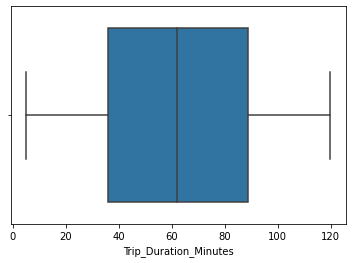

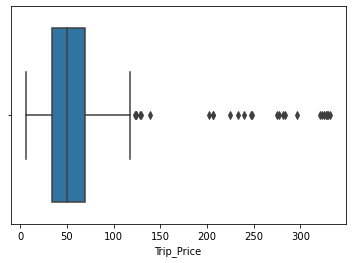

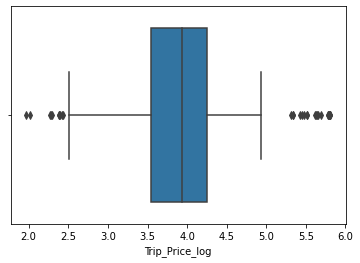

In [9]:
# For a numerical column like 'Price'
quantitative_columns = ['Trip_Distance_km', 'Trip_Distance_km_log', 'Passenger_Count','Base_Fare','Per_Km_Rate','Per_Minute_Rate','Trip_Duration_Minutes','Trip_Price', 'Trip_Price_log']

for column in quantitative_columns:
    sns.boxplot(x=df[column])
    plt.show()

In [10]:
skew_distance = df['Trip_Distance_km_log'].skew()
skew_price = df['Trip_Price_log'].skew()
print(f"Skewness of 'Trip_Distance_km': {skew_distance}")
print(f"Skewness of 'Trip_Price': {skew_price}")

Skewness of 'Trip_Distance_km': -0.7344099613468031
Skewness of 'Trip_Price': 0.0031455641917600024


**Fill NAs**

In [11]:
# Filling 'Base_Fare' with the mean because it is numerical and continous
df['Base_Fare'].fillna(df['Base_Fare'].mean(), inplace=True)

# Filling 'Passengers_Count' with the mode because it is numerical and discrete
df['Passenger_Count'].fillna(df['Passenger_Count'].mode()[0], inplace= True )

# Filling 'Per_Minute_Rate' with the ratio between 'Trip_Price' / 'Trip_Duration_Minutes'
df['Per_Minute_Rate'] = df['Per_Minute_Rate'].fillna(
    df.apply(lambda row: row['Trip_Price'] / row['Trip_Duration_Minutes'] 
                  if pd.notnull(row['Trip_Price']) and pd.notnull(row['Trip_Duration_Minutes']) 
                  else row['Per_Minute_Rate'], axis=1))

# Filling 'Per_Km_Rate' with the ratio between 'Trip_Price'/ 'Trip_Distance_km'
df['Per_Km_Rate'] = df['Per_Km_Rate'].fillna(
    df.apply(lambda row: row['Trip_Price']/row ['Trip_Distance_km']
                  if pd.notnull(row['Trip_Price']) and pd.notnull(row['Trip_Distance_km'])
                  else row['Per_Km_Rate'], axis =1))

# Filling 'Trip_Duration_Minutes' with the ratio betwen 'Trip_Price'/ 'Per_Minute_Rate'
df['Trip_Duration_Minutes'] = df['Trip_Duration_Minutes'].fillna(
    df.apply(lambda row: row['Trip_Price'] / row['Per_Minute_Rate'] 
                  if pd.notnull(row['Trip_Price']) and pd.notnull(row['Per_Minute_Rate']) 
                  else row['Trip_Duration_Minutes'], axis=1))


# Filling 'Trip_Distance_km' with the ratio between 'Trip_Price'/'Per_Km_Rate'
df['Trip_Distance_km'] = df['Trip_Distance_km'].fillna(
    df.apply(lambda row: row['Trip_Price']/row ['Per_Km_Rate']
                  if pd.notnull(row['Trip_Price']) and pd.notnull(row['Per_Km_Rate'])
                  else row['Trip_Distance_km'], axis =1))

# Filling Trip_Price with Distance
df['Trip_Price'] = df['Trip_Price'].fillna(
    df.apply(lambda row: row['Trip_Distance_km']*row ['Per_Km_Rate']
                  if pd.notnull(row['Trip_Distance_km']) and pd.notnull(row['Per_Km_Rate'])
                  else row['Trip_Price'], axis =1))

# Filling Trip_Price with Minutes
df['Trip_Price'] = df['Trip_Price'].fillna(
    df.apply(lambda row: row['Trip_Duration_Minutes']*row ['Per_Minute_Rate']
                  if pd.notnull(row['Trip_Duration_Minutes']) and pd.notnull(row['Per_Minute_Rate'])
                  else row['Trip_Price'], axis =1))

#applying AGAIN log_transformation
df['Trip_Distance_km_log'] = np.log1p(df['Trip_Distance_km'])
df['Trip_Price_log'] = np.log1p(df['Trip_Price'])

In [12]:
df.isna().sum()

Trip_Distance_km          1
Time_of_Day              49
Day_of_Week              43
Passenger_Count           0
Traffic_Conditions       47
Weather                  46
Base_Fare                 0
Per_Km_Rate               5
Per_Minute_Rate           2
Trip_Duration_Minutes     4
Trip_Price                0
Trip_Distance_km_log      1
Trip_Price_log            0
dtype: int64

In [13]:
# Filling 'Base_Fare' with the mean because it is numerical and continous
df['Base_Fare'].fillna(df['Base_Fare'].mean(), inplace=True)

# Filling 'Passengers_Count' with the mode because it is numerical and discrete
df['Passenger_Count'].fillna(df['Passenger_Count'].mode()[0], inplace= True )

# Filling 'Per_Minute_Rate' with the ratio between 'Trip_Price' / 'Trip_Duration_Minutes'
df['Per_Minute_Rate'] = df['Per_Minute_Rate'].fillna(
    df.apply(lambda row: row['Trip_Price'] / row['Trip_Duration_Minutes'] 
                  if pd.notnull(row['Trip_Price']) and pd.notnull(row['Trip_Duration_Minutes']) 
                  else row['Per_Minute_Rate'], axis=1))

# Filling 'Per_Km_Rate' with the ratio between 'Trip_Price'/ 'Trip_Distance_km'
df['Per_Km_Rate'] = df['Per_Km_Rate'].fillna(
    df.apply(lambda row: row['Trip_Price']/row ['Trip_Distance_km']
                  if pd.notnull(row['Trip_Price']) and pd.notnull(row['Trip_Distance_km'])
                  else row['Per_Km_Rate'], axis =1))

# Filling 'Trip_Duration_Minutes' with the ratio betwen 'Trip_Price'/ 'Per_Minute_Rate'
df['Trip_Duration_Minutes'] = df['Trip_Duration_Minutes'].fillna(
    df.apply(lambda row: row['Trip_Price'] / row['Per_Minute_Rate'] 
                  if pd.notnull(row['Trip_Price']) and pd.notnull(row['Per_Minute_Rate']) 
                  else row['Trip_Duration_Minutes'], axis=1))


# Filling 'Trip_Distance_km' with the ratio between 'Trip_Price'/'Per_Km_Rate'
df['Trip_Distance_km'] = df['Trip_Distance_km'].fillna(
    df.apply(lambda row: row['Trip_Price']/row ['Per_Km_Rate']
                  if pd.notnull(row['Trip_Price']) and pd.notnull(row['Per_Km_Rate'])
                  else row['Trip_Distance_km'], axis =1))

# Filling Trip_Price with Distance
df['Trip_Price'] = df['Trip_Price'].fillna(
    df.apply(lambda row: row['Trip_Distance_km']*row ['Per_Km_Rate']
                  if pd.notnull(row['Trip_Distance_km']) and pd.notnull(row['Per_Km_Rate'])
                  else row['Trip_Price'], axis =1))

# Filling Trip_Price with Minutes
df['Trip_Price'] = df['Trip_Price'].fillna(
    df.apply(lambda row: row['Trip_Duration_Minutes']*row ['Per_Minute_Rate']
                  if pd.notnull(row['Trip_Duration_Minutes']) and pd.notnull(row['Per_Minute_Rate'])
                  else row['Trip_Price'], axis =1))

#applying AGAIN log_transformation
df['Trip_Distance_km_log'] = np.log1p(df['Trip_Distance_km'])
df['Trip_Price_log'] = np.log1p(df['Trip_Price'])

In [14]:
df = df.dropna(subset=quantitative_columns)
df.reset_index(drop=True, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       983 non-null    float64
 1   Time_of_Day            934 non-null    object 
 2   Day_of_Week            940 non-null    object 
 3   Passenger_Count        983 non-null    float64
 4   Traffic_Conditions     936 non-null    object 
 5   Weather                937 non-null    object 
 6   Base_Fare              983 non-null    float64
 7   Per_Km_Rate            983 non-null    float64
 8   Per_Minute_Rate        983 non-null    float64
 9   Trip_Duration_Minutes  983 non-null    float64
 10  Trip_Price             983 non-null    float64
 11  Trip_Distance_km_log   983 non-null    float64
 12  Trip_Price_log         983 non-null    float64
dtypes: float64(9), object(4)
memory usage: 100.0+ KB


In [16]:
df.isna().sum()

Trip_Distance_km          0
Time_of_Day              49
Day_of_Week              43
Passenger_Count           0
Traffic_Conditions       47
Weather                  46
Base_Fare                 0
Per_Km_Rate               0
Per_Minute_Rate           0
Trip_Duration_Minutes     0
Trip_Price                0
Trip_Distance_km_log      0
Trip_Price_log            0
dtype: int64

# Categorical variables

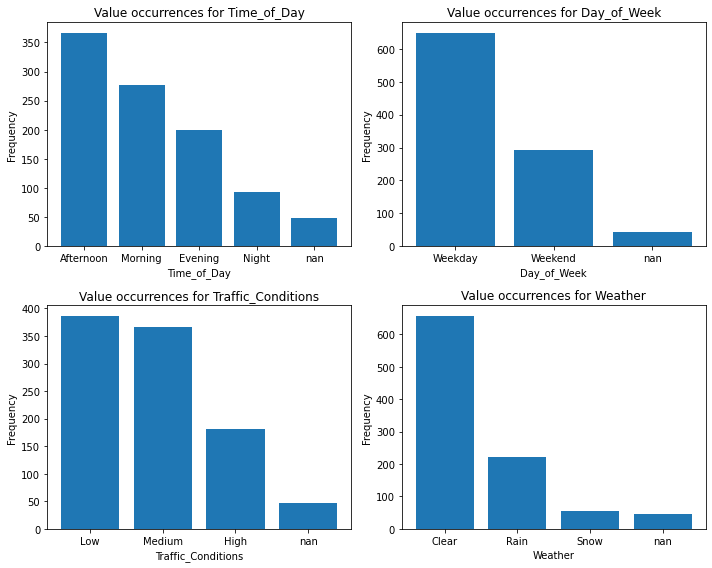

In [17]:
categorical_columns = ['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather']

fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # to show all graphs together
axes = axes.flatten()

for i,column in enumerate (categorical_columns):
    value_counts= df[column].value_counts(dropna = False)

    value_counts.index= value_counts.index.astype(str)

    axes[i].bar(value_counts.index, value_counts.values)
    axes[i].set_title(f'Value occurrences for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()

plt.show()

In [18]:
for cat in categorical_columns:
    # Take into account only numeric var. and 1 categorical var.
    select_col = quantitative_columns.copy()
    select_col.append(cat)
    select_col

    df_knn = df[select_col]

    
    # L’operatore ~ inverte i valori booleani, selezionando le righe senza NaN.
    x_train = df_knn[~df_knn.isnull().any(axis=1)]
    x_train = x_train.drop(cat, axis=1)
    x_test = df_knn[df_knn.isnull().any(axis=1)]
    x_test = x_test.drop(cat, axis=1)

    y_train = df_knn[~df_knn.isnull().any(axis=1)]
    y_train = y_train[cat]
    y_test = df_knn[df_knn.isnull().any(axis=1)]
    y_test = y_test[cat]
    
    # Normalizzazione dei dati
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    # Modello KNN
    knn = KNeighborsClassifier(n_neighbors=5)  # Usa 5 vicini
    knn.fit(x_train, y_train)

    # Predizioni
    y_pred = knn.predict(x_test)
    
    a = 0
    for i,_ in y_test.items():
        df.loc[i, cat] = y_pred[0]
        a += 1

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       983 non-null    float64
 1   Time_of_Day            983 non-null    object 
 2   Day_of_Week            983 non-null    object 
 3   Passenger_Count        983 non-null    float64
 4   Traffic_Conditions     983 non-null    object 
 5   Weather                983 non-null    object 
 6   Base_Fare              983 non-null    float64
 7   Per_Km_Rate            983 non-null    float64
 8   Per_Minute_Rate        983 non-null    float64
 9   Trip_Duration_Minutes  983 non-null    float64
 10  Trip_Price             983 non-null    float64
 11  Trip_Distance_km_log   983 non-null    float64
 12  Trip_Price_log         983 non-null    float64
dtypes: float64(9), object(4)
memory usage: 100.0+ KB


In [20]:
df.isna().sum()

Trip_Distance_km         0
Time_of_Day              0
Day_of_Week              0
Passenger_Count          0
Traffic_Conditions       0
Weather                  0
Base_Fare                0
Per_Km_Rate              0
Per_Minute_Rate          0
Trip_Duration_Minutes    0
Trip_Price               0
Trip_Distance_km_log     0
Trip_Price_log           0
dtype: int64

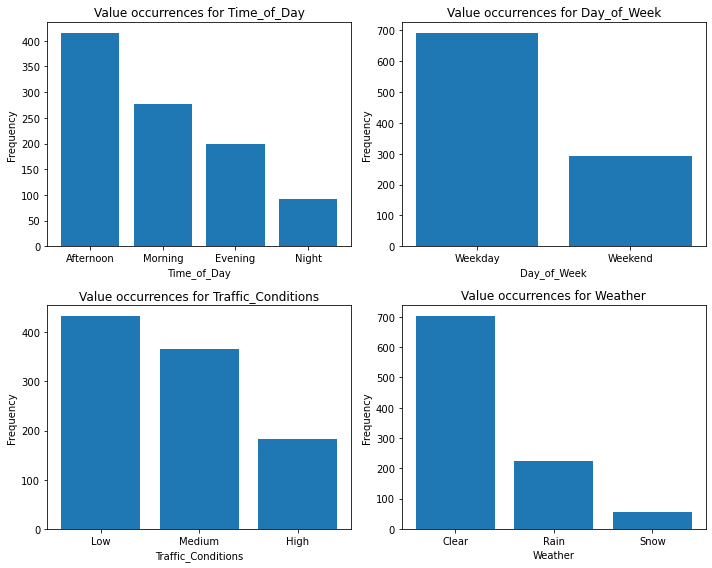

In [21]:
categorical_columns = ['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather']

fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # to show all graphs together
axes = axes.flatten()

for i,column in enumerate (categorical_columns):
    value_counts= df[column].value_counts(dropna = False)

    value_counts.index= value_counts.index.astype(str)

    axes[i].bar(value_counts.index, value_counts.values)
    axes[i].set_title(f'Value occurrences for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()

plt.show()

In [24]:
df.to_csv('Data_clean.csv', index=False)